In [192]:
import os
import re
import numpy as np
import cv2

train_dir = 'data/train'
val_dir = 'data/val'
image_size = 224

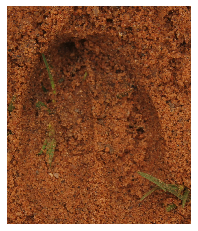

In [207]:
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread('data/train/Bongo/M Kalama/IMG_5945.JPG',cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

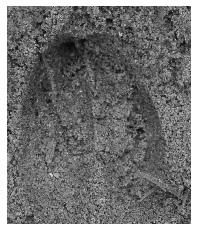

In [210]:
img_gray = cv2.imread('data/train/Bongo/M Kalama/IMG_5945.JPG',cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(img_gray,cmap='gray')

In [283]:
def load_image(image_dir):
    x = []
    y = []
    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if re.search('.jpg', file.lower()):

                #print(os.path.join(root, file))

                try:
                    #load image
                    img = cv2.resize(cv2.imread(os.path.join(root,file),cv2.IMREAD_COLOR),(image_size, image_size))
                    #get labels
                    dir_list = root.split('/')
                    #print(dir_list)
                    specie = dir_list[2]
                    gender = dir_list[3][0]
                    if gender == ' ':
                        gender = 'U'
                    name = dir_list[3][2:]
                    y.append((specie, gender, name))
                    x.append(img.reshape(-1))
                except:
                    print(f"Cannot load {os.path.join(root,file)}")
    return np.array(x),np.array(y)

In [284]:
train_x, train_y = load_image(train_dir)

Cannot load data/train/Lowland Tapir/F Feminha/Female 2 - Left 4G.jpg


In [285]:
train_x.shape

(2931, 150528)

In [286]:
print(train_y[:10], train_y[-10:])

[['Bongo' 'M' 'Kalama']
 ['Bongo' 'M' 'Kalama']
 ['Bongo' 'M' 'Kalama']
 ['Bongo' 'M' 'Kalama']
 ['Bongo' 'M' 'Kalama']
 ['Bongo' 'M' 'Kalama']
 ['Bongo' 'M' 'Kalama']
 ['Bongo' 'M' 'Kalama']
 ['Bongo' 'M' 'Kalama']
 ['Bongo' 'M' 'Kalama']] [['Cheetah' 'F' 'Sandy']
 ['Cheetah' 'F' 'Sandy']
 ['Cheetah' 'F' 'Sandy']
 ['Cheetah' 'F' 'Sandy']
 ['Cheetah' 'F' 'Sandy']
 ['Cheetah' 'F' 'Sandy']
 ['Cheetah' 'F' 'Sandy']
 ['Cheetah' 'F' 'Sandy']
 ['Cheetah' 'F' 'Sandy']
 ['Cheetah' 'F' 'Sandy']]


In [325]:
def create_labels(y):
    from numpy import array
    from numpy import argmax
    from sklearn.preprocessing import LabelEncoder
    #from sklearn.preprocessing import OneHotEncoder

    y_array = np.array(y)
    y_label = []
    y_label_onehot = []
    label_encoders = []
    onehot_label_encoders = []
    for l in range(y_array.shape[1]):
        data = np.array(y)[:,l]
        # integer encode
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(data)
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        
        # onehot
        #onehot_encoder = OneHotEncoder(sparse=False)
        #onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

        if y_label ==[]:
            y_label = integer_encoded
            #y_label_onehot = onehot_encoded
        else:
            y_label = np.hstack((y_label,integer_encoded))
            #y_label_onehot = np.hstack((y_label_onehot,onehot_encoded))
        label_encoders.append(label_encoder)
        onehot_label_encoders.append(onehot_encoder)
    return np.array(y_label), np.array(y_label_onehot), label_encoders, onehot_label_encoders

In [326]:
train_y_labels,train_y_onehot, label_encoders, onehot_label_encoders = create_labels(train_y)

/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [327]:
print(train_y_labels.shape, train_y_onehot.shape)

(2931, 3) (0,)


In [328]:
np.save('label_encoder.npy', label_encoders)
#np.save('onehot_label_encoder.npy', onehot_label_encoders)

In [330]:
for i,le in enumerate(label_encoders):
    print(le.classes_)

['African elephant' 'African lion' 'Amur Tiger' 'Bengal Tiger'
 'Black Rhino' 'Bongo' 'Cheetah' 'Jaguar' 'Leopard' 'Lowland Tapir'
 'Otter' 'Puma' 'White Rhino']
['F' 'M' 'U']
[' Singa' '1020' '140' '216' '237' '261' '279' '312' '440' '541' '565'
 '682' 'Abu' 'Adaeze' 'Aiko' 'Alex' 'Alvin' 'Amani' 'Archback' 'Aria'
 'Bambi' 'Bijan' 'Bob' 'Bow' 'Brutus' 'Bulelo' 'Busara' 'Cabloca'
 'Carlota' 'Carolina' 'Cassie' 'Catarina' 'Ceasar' 'Chica' 'Chikenya'
 'Chile 1' 'Chiquita' 'Chuva' 'Chuvisco' 'Clyde' 'Connor' 'Crispin'
 'Dalila' 'Darby' 'Ducky' 'Duma' 'Edinha' 'Elangeny' 'Elsa' 'Female A'
 'Female B' 'Feminha' 'Fenimore' 'Ferinha' 'Filio' 'Gabriela' 'Gezeppi'
 'Guma' 'HYS' 'Iamin' 'Ian' 'Inca' 'India' 'Jaci' 'Jamu' 'Jan' 'Japet'
 'Jessica' 'Julia' 'Juni' 'Juninho' 'Jurema' 'Juvboy' 'Kal Cs 6JunKML2'
 'Kal Cs 9JunKML3' 'Kal Db Himb' 'Kal Db Jav' 'Kal Db Kuz' 'Kal Db M1'
 'Kal Db M2' 'Kalakwa Cs10' 'Kalakwa Cs15' 'Kalakwa Cs17' 'Kalakwa Cs5'
 'Kalakwa Cs6' 'Kalakwa Cs7' 'Kalama' 'Karla' 'Kat

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63c9ab6e90>]],
      dtype=object)

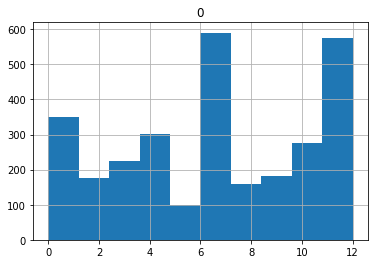

In [300]:
import pandas as pd
pd.DataFrame(y_labels[:,0]).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63c85cf750>]],
      dtype=object)

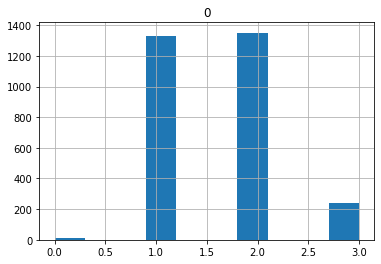

In [301]:
pd.DataFrame(y_labels[:,1]).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63c88f2850>]],
      dtype=object)

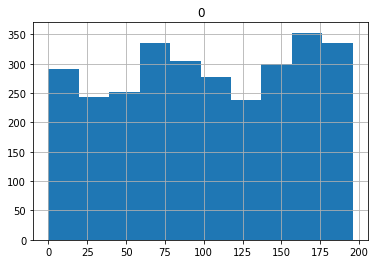

In [302]:
pd.DataFrame(y_labels[:,2]).hist()

In [331]:
val_x, val_y = load_image(val_dir)

In [336]:
def generate_labels(label_encoders, onehot_label_encoders, y):
    from numpy import array
    from numpy import argmax
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder

    y_array = np.array(y)
    y_label = []
    onehot_y_label = []
    for l in range(y_array.shape[1]-1):
        data = np.array(y_array)[:,l]
        # integer encode
        integer_encoded = label_encoders[l].transform(data)
        # binary encode
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        
        # onehot
        #onehot_encoded = onehot_label_encoders[l].transform(data)

        if y_label ==[]:
            y_label = integer_encoded
            #onehot_y_label = onehot_encoded
        else:
            y_label = np.hstack((y_label,integer_encoded))
            #onehot_y_label = np.hstack((onehot_y_label,onehot_encoded))
        
    return np.array(y_label), np.array(onehot_y_label)

In [337]:
val_y_labels, val_y_onehot_labels = generate_labels(label_encoders, onehot_label_encoders, val_y)

/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [338]:
val_y_labels

array([[ 5,  1],
       [ 5,  1],
       [ 5,  0],
       [ 5,  0],
       [ 5,  0],
       [ 5,  0],
       [ 5,  0],
       [ 5,  1],
       [ 5,  0],
       [ 5,  0],
       [ 5,  1],
       [ 5,  1],
       [ 5,  0],
       [ 5,  0],
       [ 5,  0],
       [ 5,  0],
       [ 5,  0],
       [ 5,  1],
       [ 5,  1],
       [ 5,  0],
       [ 5,  1],
       [ 5,  1],
       [ 5,  0],
       [ 5,  0],
       [ 8,  1],
       [ 8,  1],
       [ 8,  0],
       [ 8,  0],
       [ 8,  0],
       [ 8,  2],
       [ 8,  2],
       [ 8,  1],
       [ 8,  1],
       [ 8,  1],
       [ 8,  1],
       [ 8,  0],
       [ 8,  1],
       [ 8,  1],
       [12,  1],
       [12,  2],
       [12,  2],
       [12,  2],
       [12,  2],
       [12,  1],
       [12,  1],
       [12,  2],
       [12,  2],
       [12,  2],
       [12,  2],
       [12,  0],
       [12,  0],
       [12,  0],
       [12,  0],
       [12,  0],
       [12,  0],
       [12,  1],
       [12,  1],
       [12,  1],
       [12,  1

# Save files

In [255]:
train_ds = np.hstack((train_x, train_y_labels))
val_ds = np.hstack((val_x, val_y_labels))

In [340]:
pd.DataFrame(train_x).to_csv("train.csv")
pd.DataFrame(train_y_labels).to_csv("train_labels.csv")
pd.DataFrame(val_x).to_csv("val.csv")
pd.DataFrame(val_y_labels).to_csv("val_labels.csv")